## Installing requirements
- This can be done by creating a requirements.txt file and installing all the libraries in one go

In [49]:
%%capture
!pip install -r requirements.txt

In [114]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt

## Simple classification with MNIST Dataset

In [51]:
epochs = 200
batch_size = 128
nb_classes = 10
n_hidden = 128
validation_split = 0.2

In [52]:
mnist = keras.datasets.mnist

In [53]:
(X_train,Y_train), (X_test, Y_test) = mnist.load_data()
f"{X_train.shape=} & {X_test.shape =} "

'X_train.shape=(60000, 28, 28) & X_test.shape =(10000, 28, 28) '

In [54]:
# Each row is a digit
X_train = X_train.reshape(60000,784)
X_train = X_train.astype('float32')

X_test = X_test.reshape(10000,784)
X_test = X_test.astype('float32')

In [55]:
# Normalize the input
# Normalization helps with the gradient descent by providing equal updates to the weight vectors
X_train = X_train/255
X_test = X_test/255

## Convert the y variables to OHE variables
## OHE for Y labels --> Really cool
Y_train = tf.keras.utils.to_categorical(Y_train, nb_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, nb_classes)

(array([0]),)


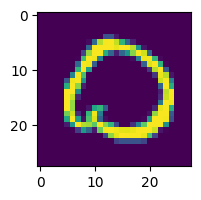

In [62]:
r = 1028
print(np.where(Y_train[r,:]==1))
plt.figure(figsize = (2,2))
plt.imshow(X_train[r,:].reshape((28,28)))


In [134]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential()

# Add the layers to the model
# it means that the input is a tensor of 784 -dimension
# this is the way how we write it
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(units=10, activation = 'softmax', name = 'D1'))
# Print the summary of the model
model.summary()
model.compile(loss=  'categorical_crossentropy', metrics = 'accuracy', optimizer = 'sgd')
m0 = model.fit(X_train, Y_train, epochs =50, batch_size = 128, validation_split = 0.2, verbose = True)


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 D1 (Dense)                  (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
375/375 [==============================] - 0s 791us/step - loss: 1.4051 - accuracy: 0.6571 - val_loss: 0.8976 - val_accuracy: 0.8245
Epoch 2/50
375/375 [==============================] - 0s 621us/step - loss: 0.7913 - accuracy: 0.8314 - val_loss: 0.6550 - val_accuracy: 0.8616
Epoch 3/50
375/375 [==============================] - 0s 619us/step - loss: 0.6397 - accuracy: 0.8533 - val_loss: 0.5587 - val_accuracy: 0.8746
Epoch 4/50
375/375 [==============================] - 0s 618us/step - loss: 0.5673 - accuracy: 0.8634 - val_loss: 0

- Epoch is one complete traversal through the data
- batch size = 128 means, at a time 128 examples of {Feature: Output} will be used to calculate the gradient. Total examples in training data = 60000 * 0.8 (accounting for validation data)/ 128 = 375
- 375 indicates number of gradient descent steps that are taken at each epoc
- The validation data in tensorflow remains same for each epoch: https://stackoverflow.com/questions/48810813/how-to-extract-train-and-validation-sets-in-keras

In [135]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
test_loss, test_acc = model.evaluate(X_test,Y_test)
print(test_acc)
print(classification_report(y_true = np.where(Y_test==1)[1], y_pred= np.argmax(model.predict(X_test), axis = 1)))

313/313 [==============================] - 0s 382us/step - loss: 0.3069 - accuracy: 0.9165
0.9164999723434448
313/313 [==============================] - 0s 299us/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.97      0.96      1135
           2       0.93      0.88      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.90      0.93      0.92       982
           5       0.91      0.85      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.91      0.92      1028
           8       0.87      0.89      0.88       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [139]:
# improving the model by adding one dense layer
model = tf.keras.Sequential(
    [
        layers.Input(shape = (784,)),
        layers.Dense(units = 20, activation = 'relu', name = 'D1'),
        layers.Dense(units = 10, activation = 'softmax', name = 'D2')
    ]
    )
model.compile(optimizer = 'SGD', loss =  'categorical_crossentropy', metrics = 'accuracy')
%timeit
m1 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)

Epoch 1/50
375/375 [==============================] - 0s 829us/step - loss: 1.5638 - accuracy: 0.5645 - val_loss: 0.9588 - val_accuracy: 0.7947
Epoch 2/50
375/375 [==============================] - 0s 825us/step - loss: 0.7685 - accuracy: 0.8153 - val_loss: 0.5895 - val_accuracy: 0.8573
Epoch 3/50
375/375 [==============================] - 0s 711us/step - loss: 0.5601 - accuracy: 0.8558 - val_loss: 0.4745 - val_accuracy: 0.8773
Epoch 4/50
375/375 [==============================] - 0s 691us/step - loss: 0.4759 - accuracy: 0.8733 - val_loss: 0.4178 - val_accuracy: 0.8880
Epoch 5/50
375/375 [==============================] - 0s 673us/step - loss: 0.4296 - accuracy: 0.8827 - val_loss: 0.3851 - val_accuracy: 0.8938
Epoch 6/50
375/375 [==============================] - 0s 656us/step - loss: 0.3997 - accuracy: 0.8898 - val_loss: 0.3625 - val_accuracy: 0.9001
Epoch 7/50
375/375 [==============================] - 0s 675us/step - loss: 0.3785 - accuracy: 0.8949 - val_loss: 0.3462 - val_accuracy:

In [136]:
## Add one more dense layer

model = tf.keras.Sequential(
    [
        layers.Input(shape = (784,)),
        layers.Dense(units = 32, activation = 'relu', name = 'D1'),
        layers.Dense(units = 16, activation = 'relu', name = 'D2'),

        layers.Dense(units = 10, activation = 'softmax', name = 'D3')
    ]
    )
model.compile(optimizer = 'SGD', loss =  'categorical_crossentropy', metrics = 'accuracy')

m2 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)

Epoch 1/50
375/375 [==============================] - 0s 874us/step - loss: 1.9152 - accuracy: 0.3899 - val_loss: 1.3692 - val_accuracy: 0.6399
Epoch 2/50
375/375 [==============================] - 0s 708us/step - loss: 1.0033 - accuracy: 0.7274 - val_loss: 0.7144 - val_accuracy: 0.8061
Epoch 3/50
375/375 [==============================] - 0s 709us/step - loss: 0.6465 - accuracy: 0.8159 - val_loss: 0.5247 - val_accuracy: 0.8570
Epoch 4/50
375/375 [==============================] - 0s 704us/step - loss: 0.5082 - accuracy: 0.8573 - val_loss: 0.4315 - val_accuracy: 0.8824
Epoch 5/50
375/375 [==============================] - 0s 707us/step - loss: 0.4313 - accuracy: 0.8791 - val_loss: 0.3757 - val_accuracy: 0.8966
Epoch 6/50
375/375 [==============================] - 0s 702us/step - loss: 0.3844 - accuracy: 0.8921 - val_loss: 0.3412 - val_accuracy: 0.9061
Epoch 7/50
375/375 [==============================] - 0s 703us/step - loss: 0.3531 - accuracy: 0.9001 - val_loss: 0.3182 - val_accuracy:

### Dense layer and Dropout
- Dropout is a way to tackle overfitting similar to regularization
- The idea behind dropout is that some output nodes are randomly dropped such that they don't take part in the model training
- During <B>Training</B>, a dropout ratio is selected 'p'. p = 0 means all are dropped, p=1 means none is dropped
- During testing: The weights will be overestimated for the neurons that were kept. Therefore, the weights are multiplied by p 

https://medium.com/analytics-vidhya/understanding-dropout-abe00504be82


In [137]:
## Add one more dense layer

model = tf.keras.Sequential(
    [
        layers.Input(shape = (784,)),
        layers.Dense(units = 32, activation = 'relu', name = 'D1'),
        tf.keras.layers.Dropout(rate = 0.5, seed = 42),
        layers.Dense(units = 16, activation = 'relu', name = 'D2'),

        layers.Dense(units = 10, activation = 'softmax', name = 'D3')
    ]
    )
model.compile(optimizer = 'SGD', loss =  'categorical_crossentropy', metrics = 'accuracy')

m3 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)

Epoch 1/50
375/375 [==============================] - 0s 877us/step - loss: 2.2103 - accuracy: 0.1777 - val_loss: 1.9755 - val_accuracy: 0.4114
Epoch 2/50
375/375 [==============================] - 0s 736us/step - loss: 1.8464 - accuracy: 0.3695 - val_loss: 1.4374 - val_accuracy: 0.6572
Epoch 3/50
375/375 [==============================] - 0s 718us/step - loss: 1.4289 - accuracy: 0.5423 - val_loss: 0.9574 - val_accuracy: 0.7593
Epoch 4/50
375/375 [==============================] - 0s 748us/step - loss: 1.1513 - accuracy: 0.6233 - val_loss: 0.7318 - val_accuracy: 0.8164
Epoch 5/50
375/375 [==============================] - 0s 746us/step - loss: 1.0061 - accuracy: 0.6709 - val_loss: 0.6190 - val_accuracy: 0.8433
Epoch 6/50
375/375 [==============================] - 0s 737us/step - loss: 0.9203 - accuracy: 0.6991 - val_loss: 0.5518 - val_accuracy: 0.8598
Epoch 7/50
375/375 [==============================] - 0s 729us/step - loss: 0.8571 - accuracy: 0.7206 - val_loss: 0.5017 - val_accuracy:

In [141]:
# Effect of optimization algorithms on the training process
## Add one more dense layer

model = tf.keras.Sequential(
    [
        layers.Input(shape = (784,)),
        layers.Dense(units = 32, activation = 'relu', name = 'D1'),
        layers.Dense(units = 16, activation = 'relu', name = 'D2'),

        layers.Dense(units = 10, activation = 'softmax', name = 'D3')
    ]
    )
model.compile(optimizer = 'Adam', loss =  'categorical_crossentropy', metrics = 'accuracy')

m4 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)

# Effect of optimization algorithms on the training process
## Add one more dense layer

model = tf.keras.Sequential(
    [
        layers.Input(shape = (784,)),
        layers.Dense(units = 32, activation = 'relu', name = 'D1'),
        layers.Dense(units = 16, activation = 'relu', name = 'D2'),

        layers.Dense(units = 10, activation = 'softmax', name = 'D3')
    ]
    )
model.compile(optimizer = 'RMSprop', loss =  'categorical_crossentropy', metrics = 'accuracy')

m5 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)

Epoch 1/50
375/375 [==============================] - 1s 1ms/step - loss: 0.6045 - accuracy: 0.8281 - val_loss: 0.2819 - val_accuracy: 0.9193
Epoch 2/50
375/375 [==============================] - 0s 870us/step - loss: 0.2726 - accuracy: 0.9229 - val_loss: 0.2295 - val_accuracy: 0.9352
Epoch 3/50
375/375 [==============================] - 0s 989us/step - loss: 0.2224 - accuracy: 0.9372 - val_loss: 0.2079 - val_accuracy: 0.9414
Epoch 4/50
375/375 [==============================] - 0s 883us/step - loss: 0.1933 - accuracy: 0.9447 - val_loss: 0.1825 - val_accuracy: 0.9475
Epoch 5/50
375/375 [==============================] - 0s 870us/step - loss: 0.1715 - accuracy: 0.9509 - val_loss: 0.1775 - val_accuracy: 0.9482
Epoch 6/50
375/375 [==============================] - 0s 896us/step - loss: 0.1551 - accuracy: 0.9548 - val_loss: 0.1731 - val_accuracy: 0.9492
Epoch 7/50
375/375 [==============================] - 0s 889us/step - loss: 0.1420 - accuracy: 0.9585 - val_loss: 0.1615 - val_accuracy: 0

# Regularization

This is used to combat the overfitting problem. It helps in two ways:
- Choosing a simple model means easier to train (less computationally demanding)
- Better generalization power

Model is nothing but a vector of weights. Complexity can be controlled by setting some weights to either zero or very close to zero.

The objective function of training is : $Obj\space = min(Loss_{training} | Model)$


To incorporate the regularizartion, this is modified to :
$Obj\space = min(Loss_{training} | Model) \space + \lambda* Complexity_{model}$

Here $\lambda $ can be used as a hyperparameter to indicate how much we want to weigh in complexity in the objective function


Types of regularizers: https://stats.stackexchange.com/questions/383310/what-is-the-difference-between-kernel-bias-and-activity-regulizers-and-when-t

- There are three type of regularizers in Keras:
    You have the regression equation 𝑦=𝑊𝑥+𝑏, where 𝑥 is the input, 𝑊 the weights matrix and 𝑏 the bias.

    - Kernel Regularizer: Tries to reduce the weights 𝑊 (excluding bias).
    - Bias Regularizer: Tries to reduce the bias 𝑏.
    - Activity Regularizer: Tries to reduce the layer's output 𝑦, thus will reduce the weights and adjust bias so 𝑊𝑥+𝑏 is smallest.

- The concept of Batch Normalization (https://www.youtube.com/watch?v=1XMjfhEFbFA)
 - Consider a deep neural network. In a DNN, we typically use a version of mini-match algorithm to train. This means that we use a batch-size to train our models
 - What would happen if distribution of inputs change with each batch?
    - This is bad because we will have to keep on constantly adjust to the new distribution
        - Solution: What if we make the data gaussian at the input of each layer?
        - For a mini batch, for input to each layer, apply a normalization function to transform it to 0 mean 1 variance: $ \hat{S}_i = (S_i - E[S_i])/\sqrt{var(S_i)}$ 
        - What if this is not right? How to account for that?
        - Provide the freedom to the network to adjust back, if required  i.e. learn the output as  - $y_k   = \gamma_k * \hat{S_{ik}} + \beta_k$ where $y_k$ is the output of the kth layer ; $\gamma_k , \beta_k$ are learnable parameters. Meaning, for each layer we will have 2 set of parameters that will be learnt and 2 set of parameters that will not be learnt (mean and variance to apply to the input)

In [145]:
from keras.regularizers import l1,l2

model = tf.keras.Sequential(
    [
        layers.Input(shape = (784,)),
        layers.Dense(units = 32, activation = 'relu', name = 'D1', kernel_regularizer = l2(0.01), activity_regularizer = l2(0.01), bias_regularizer = l1(0.01)),
        layers.Dense(units = 16, activation = 'relu', name = 'D2'),

        layers.Dense(units = 10, activation = 'softmax', name = 'D3')
    ]
    )
model.compile(optimizer = 'SGD', loss =  'categorical_crossentropy', metrics = 'accuracy')

m6 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)



Epoch 1/50
375/375 [==============================] - 0s 908us/step - loss: 2.6184 - accuracy: 0.3800 - val_loss: 2.2825 - val_accuracy: 0.5543
Epoch 2/50
375/375 [==============================] - 0s 727us/step - loss: 1.9696 - accuracy: 0.6413 - val_loss: 1.6613 - val_accuracy: 0.7250
Epoch 3/50
375/375 [==============================] - 0s 759us/step - loss: 1.4909 - accuracy: 0.7684 - val_loss: 1.3051 - val_accuracy: 0.8264
Epoch 4/50
375/375 [==============================] - 0s 746us/step - loss: 1.2143 - accuracy: 0.8367 - val_loss: 1.0826 - val_accuracy: 0.8673
Epoch 5/50
375/375 [==============================] - 0s 734us/step - loss: 1.0288 - accuracy: 0.8661 - val_loss: 0.9312 - val_accuracy: 0.8880
Epoch 6/50
375/375 [==============================] - 0s 743us/step - loss: 0.8972 - accuracy: 0.8830 - val_loss: 0.8214 - val_accuracy: 0.8992
Epoch 7/50
375/375 [==============================] - 0s 747us/step - loss: 0.8001 - accuracy: 0.8940 - val_loss: 0.7381 - val_accuracy:

In [156]:
from tensorflow.keras.layers import BatchNormalization

model = tf.keras.Sequential(
    [
        layers.Input(shape = (784,)),
        
        layers.Dense(units = 32, activation = 'relu', name = 'D1'),
        BatchNormalization(),
        layers.Dense(units = 16, activation = 'relu', name = 'D2'),
        BatchNormalization(),
        layers.Dense(units = 10, activation = 'softmax', name = 'D3')
    ]
    )
model.compile(optimizer = 'SGD', loss =  'categorical_crossentropy', metrics = 'accuracy')
print(model.summary())
# m7 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 D1 (Dense)                  (None, 32)                25120     
                                                                 
 batch_normalization_9 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 D2 (Dense)                  (None, 16)                528       
                                                                 
 batch_normalization_10 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 D3 (Dense)                  (None, 10)                170       
                                                                 
Total params: 26010 (101.60 KB)
Trainable params: 259

In the above code, the batchnormalization layer has output shape same as the output shape of the layer on which it is applied. It has 4* number of units as parameters. 
 - 2 * num of units are trainable parameters: These are the $\gamma$ and $\beta$ we mentioned above
 - 2* num of units are the moving average means and variance that are recorded and stored for each unit in a layer to use at inference time 

In [157]:
m7 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)

Epoch 1/50
375/375 [==============================] - 1s 1ms/step - loss: 1.0555 - accuracy: 0.7071 - val_loss: 0.6678 - val_accuracy: 0.8506
Epoch 2/50
375/375 [==============================] - 0s 839us/step - loss: 0.5459 - accuracy: 0.8646 - val_loss: 0.4241 - val_accuracy: 0.8949
Epoch 3/50
375/375 [==============================] - 0s 972us/step - loss: 0.4095 - accuracy: 0.8945 - val_loss: 0.3424 - val_accuracy: 0.9097
Epoch 4/50
375/375 [==============================] - 0s 835us/step - loss: 0.3403 - accuracy: 0.9081 - val_loss: 0.2973 - val_accuracy: 0.9214
Epoch 5/50
375/375 [==============================] - 0s 859us/step - loss: 0.2964 - accuracy: 0.9201 - val_loss: 0.2690 - val_accuracy: 0.9277
Epoch 6/50
375/375 [==============================] - 0s 863us/step - loss: 0.2680 - accuracy: 0.9256 - val_loss: 0.2454 - val_accuracy: 0.9326
Epoch 7/50
375/375 [==============================] - 0s 882us/step - loss: 0.2454 - accuracy: 0.9310 - val_loss: 0.2332 - val_accuracy: 0

<Figure size 20000x500 with 0 Axes>

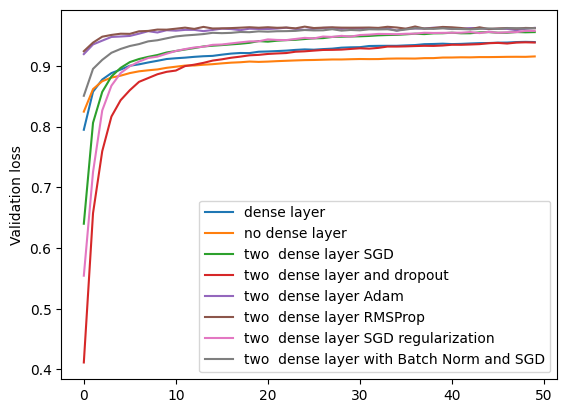

In [166]:
plt.figure(figsize = (200,5))
fig, ax = plt.subplots()
ax.plot(m1.history['val_accuracy'], label = 'dense layer')
ax.plot(m0.history['val_accuracy'], label  = 'no dense layer')
ax.plot(m2.history['val_accuracy'], label  = 'two  dense layer SGD')
ax.plot(m3.history['val_accuracy'], label  = 'two  dense layer and dropout')
ax.plot(m4.history['val_accuracy'], label  = 'two  dense layer Adam')
ax.plot(m5.history['val_accuracy'], label  = 'two  dense layer RMSProp')
ax.plot(m6.history['val_accuracy'], label  = 'two  dense layer SGD regularization')
ax.plot(m7.history['val_accuracy'], label  = 'two  dense layer with Batch Norm and SGD')

ax.set_ylabel('Validation loss')
plt.legend()

## Sentiment Analysis

In [230]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from typing import List

In [168]:
(X_train,Y_train), (X_test, Y_test) = keras.datasets.imdb.load_data(num_words = 10_000)

17464789/17464789 [==============================] - 0s 0us/step


In [192]:
print(f"{X_train.shape=  } , {X_test.shape = }"  )

# This is how each record in the X_train looks like
# each word is represented by the word frequency. Meaning the second word in the ```X_train[0]``` is 14th most frequent word in the corpus
X_train[0][0:5]

X_train.shape=  (25000,) , X_test.shape = (25000,)


[1, 14, 22, 16, 43]

In [231]:
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1 # This character is used to symbolize that here will the review start from 
oov_char = 2 # This indicates whether a character is absent from the vocabulary
index_from = 3
# Retrieve the training sequences.
(x_train, _), _ = keras.datasets.imdb.load_data(
    start_char=start_char, oov_char=oov_char, index_from=index_from
)
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
# since we have designated the index 1 and 2 to start and OOV
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset
def decode(inp: list):    
    decoded_sequence = " ".join(inverted_word_index[i] for i in inp)
    return decoded_sequence


In [235]:
for i in [2,5,7]:
    print(decode(X_train[i]), "\n")

[START] this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had [OOV] working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how [OOV] this is to watch save yourself an hour a bit of your life 

[START] begins better than it ends funny that the russian submarine crew [OOV] all other actors it's like those scenes where documentary shots br br spoiler part the message [OOV] was contrary to the whole story it just does not [OOV] br br 

[START] the [OOV] tells the story of the four hamilton

In [311]:
# Input will be fed into a neural network and the lengths of the input should be same.
print(f"len of first 5 comments {[len(x) for x in X_train][0:5]}\n")

# padding is done using the tf.keras.preprocessing --> It is similar to sklearn preprocessing stuff
X_train_padded = keras.preprocessing.sequence.pad_sequences(sequences = X_train,maxlen=200)
X_test_padded  = keras.preprocessing.sequence.pad_sequences(sequences = X_test,maxlen=200)

# lets understand the padding
# for one where len > max_len
# in such cases first n-maxlen elements are chipped off of the array
assert np.all(np.equal(np.array(X_train_padded[0,:]), np.array(X_train[0][len(X_train[0])- 200:])))
# for one where len < max_len
# They are padded with zeros in the beginning
assert np.all(X_train[1] == X_train_padded[1,200-len((X_train[1])):])

len of first 5 comments [218, 189, 141, 550, 147]

len(X_train[0])=218


## Understand the concept of embedding layer
 - Embedding layer is similar to a lookup table. 
 - The embeddings are learn in the process of accomplishing a task

In [314]:
from keras.layers import Embedding
model = keras.Sequential(
    [
        layers.Input(shape = (2,)),
        Embedding(input_dim=2, output_dim=20, input_length=)
    ]
)

In [316]:
?Embedding

Init signature:
Embedding(
    input_dim,
    output_dim,
    embeddings_initializer='uniform',
    embeddings_regularizer=None,
    activity_regularizer=None,
    embeddings_constraint=None,
    mask_zero=False,
    input_length=None,
    sparse=False,
    **kwargs,
)
Docstring:     
Turns positive integers (indexes) into dense vectors of fixed size.

e.g. `[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]`

This layer can only be used on positive integer inputs of a fixed range. The
`tf.keras.layers.TextVectorization`, `tf.keras.layers.StringLookup`,
and `tf.keras.layers.IntegerLookup` preprocessing layers can help prepare
inputs for an `Embedding` layer.

This layer accepts `tf.Tensor`, `tf.RaggedTensor` and `tf.SparseTensor`
input.

Example:

>>> model = tf.keras.Sequential()
>>> model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))
>>> # The model will take as input an integer matrix of size (batch,
>>> # input_length), and the largest integer (i.e. word index) in the input
>>> 